# QONTO

## Step 1 - Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

data_path = "/Users/qxzjy/vscworkspace/dse-ft-100/python_module/data/"

## Step 2 - Import Datasetv

In [4]:
loans_df = pd.read_csv(data_path + "qonto_loans.csv")
loans_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
0,182940,0,Cash loans,F,N,N,0,90000.0,835380.0,23571.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019689
1,397049,1,Cash loans,M,Y,Y,0,225000.0,254700.0,20250.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029
2,120845,1,Cash loans,M,Y,Y,3,135000.0,755190.0,38686.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164
3,155211,0,Revolving loans,M,N,N,2,180000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007305
4,172542,0,Cash loans,M,N,Y,0,270000.0,781920.0,33129.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007330


## Step 3 - EDA

In [ ]:
# Get the mean of numerical column
loans_df.select_dtypes(include='number').mean()

SK_ID_CURR                    278434.555600
TARGET                             0.077500
CNT_CHILDREN                       0.419200
AMT_INCOME_TOTAL              167780.011693
AMT_CREDIT                    603476.101800
AMT_ANNUITY                    26909.101710
AMT_GOODS_PRICE               541461.026708
REGION_POPULATION_RELATIVE         0.021051
dtype: float64

## Step 4 - Define hypothesises

H<sub>0</sub> : TARGET >= 0,085

H<sub>1</sub> : TARGET < 0,085


## Step 5 - Calculate Z-score

In [42]:
# Z = (X - mu) / sigma / n
# -> X = mean
# -> mu = mean H1
# -> sigma = standard deviation
# -> n = sample size
target_avg = loans_df.TARGET.mean()
target_std = loans_df.TARGET.std()
target_mean_h1 = 0.085 
sample_size = len(loans_df)

print(f"Average : {target_avg} | Standard deviation {target_std} | Average HO : {target_mean_h1}")

z_score = (target_avg - target_mean_h1) / (target_std / np.sqrt(sample_size))
print(f"Z-Score : {z_score}")

Average : 0.0775 | Standard deviation 0.2673965222100235 | Average HO : 0.085
Z-Score : -2.804823315581202


## Step 6 - Set α

In [22]:
target_alpha = 0.05
print(f"Confidence level (alpha) = {target_alpha}")

Confidence level (alpha) = 0.05


## Step 7 - Compare p-value to α

In [23]:
# Using ztest function from the statsmodels.stats.weightstat library
target_z_score, p_value = ztest(loans_df.TARGET, alternative='smaller', value=target_mean_h1)

print("Z_score : {}".format(target_z_score))
print("p-value : {}".format(p_value))

if p_value < target_alpha:
    print(f"Null hypothesis H0 rejected")
else:
    print("Null hypothesis H0 not rejected")

Z_score : -2.8048233155813316
p-value : 0.0025172084065654848
Null hypothesis H0 rejected


## Step 8 (Optional) - Visualize probability

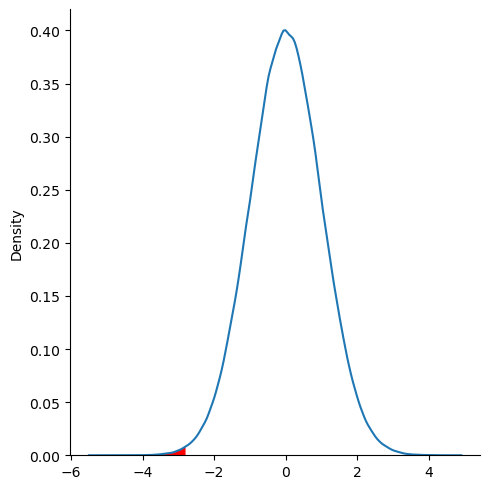

In [40]:
# Distplot from seaborn gives us a distribution from what is inside the parenthesis
# => Dispolot is deprecated, we're going to use Displot instead
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
# => Deprecated attribute, we're using kind="kde" which is the same as a kdeplot(kernel density estimation)
ax = sns.displot(np.random.normal(0, 1, size=1000000), kind="kde") 

# => Since Displot isn't working like Distplot, we need to access the matplotlib axes differently
axes = ax.axes[0, 0]

# This is a mask that will let us filter only the values beyond z-score
mask = axes.lines[0].get_xydata()[:, 0] < target_z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = axes.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = axes.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
axes.fill_between(x_area_under_curve, y_area_under_curve, color="red")

plt.show()